<a href="https://colab.research.google.com/github/laxmiprasanna8741/pytorch-practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt


In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root = "cnn_data", train = True , download= True, transform= transform)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.34MB/s]


In [ ]:
test_data = datasets.MNIST(root = "cnn_data", train = False , download= True, transform= transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader = DataLoader(train_data,batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data,batch_size = 10 , shuffle = False)


In [ ]:
conv1 = nn.Conv2d(in_channels = 1 , out_channels=6,kernel_size=3,stride = 1)
conv2 = nn.Conv2d(in_channels = 6 ,out_channels=16,kernel_size=3,stride=1)

In [ ]:
for i ,(X_train,y_train) in enumerate(train_data):
  break

In [ ]:
X_train.shape

torch.Size([1, 28, 28])

In [ ]:
x = X_train.view(1,1,28,28)

In [ ]:
x = F.relu(conv1(x))

In [ ]:
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
x = F.relu(conv2(x))

In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
class ConvolutionalNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels=6, kernel_size = 3 , stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 6 ,out_channels = 16 , kernel_size = 3 ,stride = 1)

    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    x = x.view(-1 , 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x,dim=1)

In [ ]:
torch.manual_seed(32)
model = ConvolutionalNeuralNetwork()
model

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs = 5
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_crct = 0
  tst_crct = 0

  for b , (X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_crct += batch_corr


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 ==0:
      print(f'epoach {i} batch {b} Loss {loss.item()}')

  train_loss.append(loss)
  train_correct.append(trn_crct)

  with torch.no_grad():
    for b ,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_train)
      loss = criterion(y_val,y_test)

      predicted = torch.max(y_val.data,1)[1]
      batch_corr = (predicted == y_test).sum()
      tst_crct += batch_corr

    test_correct.append(tst_crct)
    test_loss.append(loss)

epoach 0 batch 600 Loss 0.13103725016117096
epoach 0 batch 1200 Loss 0.35453492403030396
epoach 0 batch 1800 Loss 0.08083946257829666
epoach 0 batch 2400 Loss 0.026289600878953934
epoach 0 batch 3000 Loss 0.15584251284599304
epoach 0 batch 3600 Loss 0.014798944815993309
epoach 0 batch 4200 Loss 0.0117879593744874
epoach 0 batch 4800 Loss 0.4495416283607483
epoach 0 batch 5400 Loss 0.20925548672676086
epoach 0 batch 6000 Loss 0.000620567356236279
epoach 1 batch 600 Loss 0.0011812451994046569
epoach 1 batch 1200 Loss 0.013458045199513435
epoach 1 batch 1800 Loss 0.16024300456047058
epoach 1 batch 2400 Loss 0.00032476650085300207
epoach 1 batch 3000 Loss 0.010508202947676182
epoach 1 batch 3600 Loss 0.014057870022952557
epoach 1 batch 4200 Loss 0.05080819129943848
epoach 1 batch 4800 Loss 0.0053984662517905235
epoach 1 batch 5400 Loss 0.12581726908683777
epoach 1 batch 6000 Loss 0.0011829675640910864
epoach 2 batch 600 Loss 0.01003392692655325
epoach 2 batch 1200 Loss 0.004231090657413006

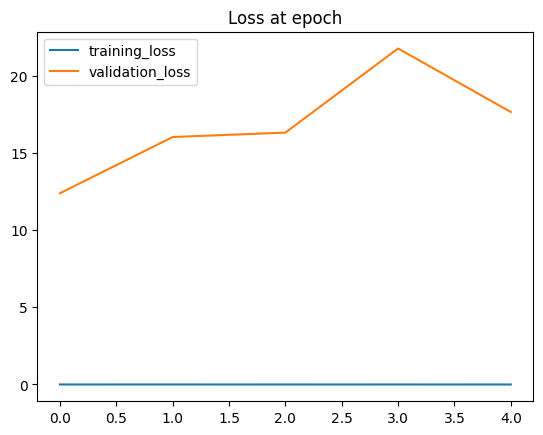

In [ ]:
train_losses = [tl.item() for tl in train_loss]
test_losses = [tl.item() for tl in test_loss]
plt.plot(train_losses , label = "training_loss")
plt.plot(test_losses , label = "validation_loss")
plt.title("Loss at epoch")
plt.legend()

In [ ]:
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
with torch.no_grad():
  y_pred = model(test_data[1978][0].view(1,1,28,28))
  predict = torch.max(y_pred,1)[1]

print(predict)

tensor([4])
